# Getting Started
ใช้ไลบรารี่ `Pandas` และ `Matplotlib` เพื่อช่วยในการวิเคราะห์ข้อมูลที่ดีขึ้น

In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_excel('data.xlsx')

คำนวณ `Waiting Time` โดยคิดได้จากการนำ `Completion Time` มาลบกับ `Entry Time`

In [2]:
def convertToSecond(hhmmss):
    h,m,s = [int(i) for i in hhmmss.split(':')]
    return (h*60+m)*60+s

def convertToMinute(hhmmss):
    h,m,s = [int(i) for i in hhmmss.split(':')]
    return h*60+m+s/60

entryTime = dataset["Entry Time"].astype(str)
completedTime = dataset["Completion Time"].astype(str)

entryTimeSecond = entryTime.apply(convertToMinute)
completedTimeSecond = completedTime.apply(convertToMinute)

dataset["Waiting Time"] = completedTimeSecond - entryTimeSecond

# Does the financial type affect the waiting time?


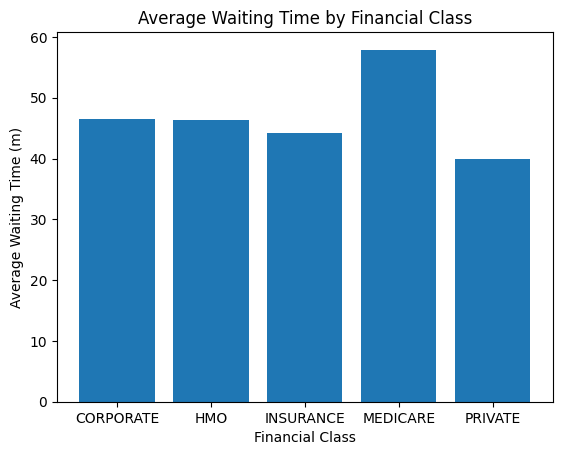

In [3]:
financeAWT = dataset.groupby("Financial Class")["Waiting Time"].mean()

# Create Bar Chart
plt.bar(financeAWT.index, financeAWT)
plt.xlabel("Financial Class")
plt.ylabel("Average Waiting Time (m)")
plt.title("Average Waiting Time by Financial Class")
plt.show()

# What days of week are affected ?

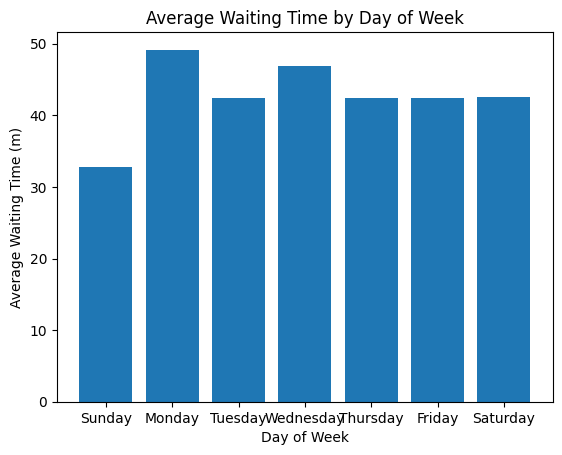

In [4]:
dataset["Day of Week"] = dataset["Date"].dt.day_name()

dayOfWeekAWT = dataset.groupby("Day of Week")["Waiting Time"].mean()
dayOfWeekAWT = dayOfWeekAWT.reindex(["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

# Create Bar Chart
plt.bar(dayOfWeekAWT.index, dayOfWeekAWT)
plt.xlabel("Day of Week")
plt.ylabel("Average Waiting Time (m)")
plt.title("Average Waiting Time by Day of Week")
plt.show()

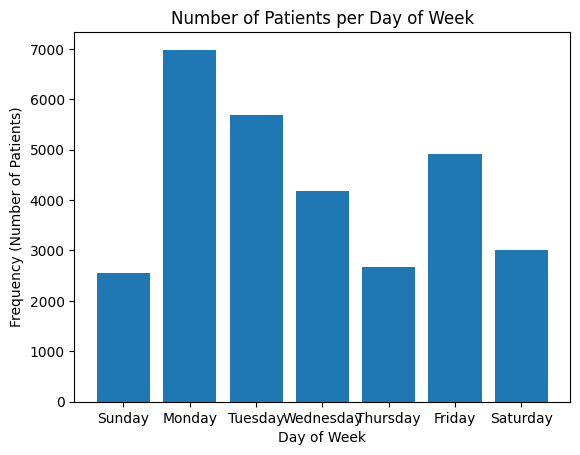

In [5]:
fequencyCount = dataset.groupby("Day of Week")["Waiting Time"].count().reindex(["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

# Create Bar Chart
plt.bar(fequencyCount.index, fequencyCount)
plt.xlabel("Day of Week")
plt.ylabel("Frequency (Number of Patients)")
plt.title("Number of Patients per Day of Week")
plt.show()

# Are waiting times associated with the busy periods (morning hours)?

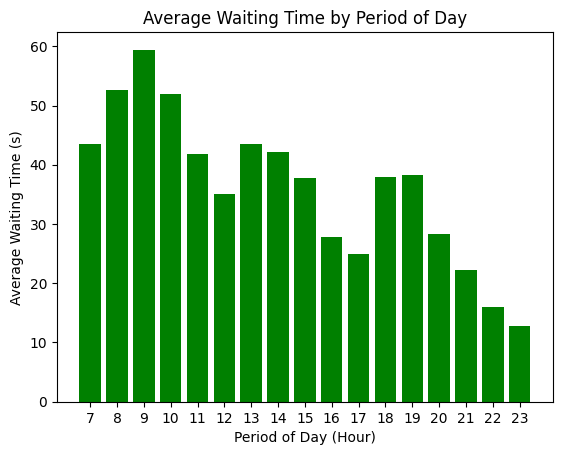

In [6]:
def periodOfDay(hhmmss):
    return [int(i) for i in hhmmss.split(':')][0]

dataset["Period of Day"] = entryTime.apply(periodOfDay)

busyPeriodAWT = dataset.groupby("Period of Day")["Waiting Time"].mean()

# Create Bar Chart
plt.bar(busyPeriodAWT.index, busyPeriodAWT,color="green")
plt.xlabel("Period of Day (Hour)")
plt.ylabel("Average Waiting Time (s)")
plt.title("Average Waiting Time by Period of Day")
plt.xticks(busyPeriodAWT.index)
plt.show()

In [11]:
with pd.ExcelWriter('waiting_time_analysis.xlsx',mode='w') as writer:
    pd.DataFrame(dataset, columns=['Financial Class', 'Waiting Time']).to_excel(writer, sheet_name='Financial Waiting Time')
    financeAWT.to_excel(writer, sheet_name='Financial AWT')

    pd.DataFrame(dataset, columns=['Day of Week', 'Waiting Time']).to_excel(writer, sheet_name='Day Waiting Time')
    dayOfWeekAWT.to_excel(writer, sheet_name='Day of Week AWT')
    fequencyCount.to_excel(writer, sheet_name='Day of Week Patient Count')

    pd.DataFrame(dataset, columns=['Period of Day', 'Waiting Time']).to_excel(writer, sheet_name='Period of Day Waiting Time')
    busyPeriodAWT.to_excel(writer, sheet_name='Period of Day AWT')